In [1]:
import h2o
from h2o.automl import H2OAutoML

h2o.init(max_mem_size='10G')

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,21 hours 3 mins
H2O_cluster_timezone:,America/Indiana/Indianapolis
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.3
H2O_cluster_version_age:,6 months and 3 days !!!
H2O_cluster_name:,H2O_from_python_aacastellanosb_ztluu6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,29.08 Gb
H2O_cluster_total_cores:,24
H2O_cluster_allowed_cores:,24
H2O_cluster_status:,"locked, healthy"


In [2]:
train = h2o.import_file('titanic.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [3]:
train.describe()


Rows:1309
Cols:14




,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
type,int,int,string,enum,real,int,int,int,real,enum,enum,int,int,enum
mins,1.0,0.0,NaN,,0.17,0.0,0.0,680.0,0.0,,,1.0,1.0,
mean,2.294881588999236,0.3819709702062643,NaN,,29.881137667304014,0.4988540870893812,0.3850267379679144,249039.1368861024,33.29547928134557,,,9.404522613065327,160.8099173553719,
maxs,3.0,1.0,NaN,,80.0,8.0,9.0,3101298.0,512.3292,,,16.0,328.0,
sigma,0.8378360189701275,0.4860551708664827,NaN,,14.413493211271323,1.0416583905961019,0.8655602753495147,442685.31767656433,51.75866823917412,,,4.35741698360494,97.6969219960031,
zeros,0,809,0,,0,891,1002,0,17,,,0,0,
missing,0,0,0,0,263,0,0,352,1,1014,2,911,1188,564
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0,0.0,0.0,24160.0,211.3375,B5,S,2.0,nan,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.92,1.0,2.0,113781.0,151.55,C22 C26,S,11.0,nan,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0,1.0,2.0,113781.0,151.55,C22 C26,S,nan,nan,"Montreal, PQ / Chesterville, ON"


In [6]:
x = train.columns
y = "survived"

In [7]:
# For binary classification, response should be a factor
train[y] = train[y].asfactor()
x.remove(y)

In [8]:
%%time
# Run AutoML for 10 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=10, seed=42, max_runtime_secs=7200)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |
10:44:49.828: AutoML: XGBoost is not available; skipping it.
10:44:49.829: Step 'best_of_family_xgboost' not defined in provider 'StackedEnsemble': skipping it.
10:44:49.829: Step 'all_xgboost' not defined in provider 'StackedEnsemble': skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
Wall time: 29.7 s
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_2_AutoML_2_20220411_104449

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.023554090326209653
RMSE: 0.15347341895654001
LogLoss: 0.0984013676888949
Null degrees of freedom: 1308
Residual degrees of freedom: 1303
Null deviance: 1741.0243829292885
Residual deviance: 257.61478060952686
AIC: 269.61478060952686
AUC: 0.9950568603213844
AUCPR: 0.9935036521203053
Gini: 0.9901137206427688

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3622645625569989: 


,,0,1,Error,Rate
0,0,797.0,12.0,0.0148,(12.0/809.0)
1,1,17.0,483.0,0.034,(17.0/500.0)
2,Total,814.0,495.0,0.0222,(29.0/1309.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.362265,0.970854,132.0
1,max f2,0.214925,0.968762,159.0
2,max f0point5,0.584721,0.980475,106.0
3,max accuracy,0.395593,0.977846,126.0
4,max precision,0.999604,1.000000,0.0
5,max recall,0.054223,1.000000,284.0
6,max specificity,0.999604,1.000000,0.0
7,max absolute_mcc,0.395593,0.953031,126.0
8,max min_per_class_accuracy,0.277745,0.970000,144.0
9,max mean_per_class_accuracy,0.362265,0.975583,132.0



Gains/Lift Table: Avg response rate: 38.20 %, avg score: 39.19 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010695,0.999366,2.618000,2.618000,1.000000,0.999474,1.000000,0.999474,0.028,0.028,161.800000,161.800000,0.028000
1,2,0.020626,0.999299,2.618000,2.618000,1.000000,0.999329,1.000000,0.999404,0.026,0.054,161.800000,161.800000,0.054000
2,3,0.030558,0.999229,2.618000,2.618000,1.000000,0.999258,1.000000,0.999357,0.026,0.080,161.800000,161.800000,0.080000
3,4,0.040489,0.999169,2.618000,2.618000,1.000000,0.999196,1.000000,0.999317,0.026,0.106,161.800000,161.800000,0.106000
4,5,0.050420,0.999110,2.618000,2.618000,1.000000,0.999147,1.000000,0.999284,0.026,0.132,161.800000,161.800000,0.132000
5,6,0.100076,0.998598,2.618000,2.618000,1.000000,0.998879,1.000000,0.999083,0.130,0.262,161.800000,161.800000,0.262000
6,7,0.150497,0.998069,2.618000,2.618000,1.000000,0.998374,1.000000,0.998846,0.132,0.394,161.800000,161.800000,0.394000
7,8,0.200153,0.997216,2.618000,2.618000,1.000000,0.997679,1.000000,0.998556,0.130,0.524,161.800000,161.800000,0.524000
8,9,0.300229,0.975846,2.618000,2.618000,1.000000,0.993923,1.000000,0.997012,0.262,0.786,161.800000,161.800000,0.786000
9,10,0.400306,0.217017,1.898550,2.438137,0.725191,0.604660,0.931298,0.898924,0.190,0.976,89.854962,143.813740,0.931501




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.0535917267476587
RMSE: 0.23149886986259502
LogLoss: 0.18983691109194986
Null degrees of freedom: 1308
Residual degrees of freedom: 1302
Null deviance: 1742.7793568129837
Residual deviance: 496.9930332387247
AIC: 510.9930332387247
AUC: 0.9666464771322621
AUCPR: 0.9632947811967137
Gini: 0.9332929542645243

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5338764421457145: 


,,0,1,Error,Rate
0,0,797.0,12.0,0.0148,(12.0/809.0)
1,1,73.0,427.0,0.146,(73.0/500.0)
2,Total,870.0,439.0,0.0649,(85.0/1309.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.533876,0.909478,99.0
1,max f2,0.127937,0.908916,230.0
2,max f0point5,0.725866,0.952491,78.0
3,max accuracy,0.533876,0.935065,99.0
4,max precision,0.999974,1.000000,0.0
5,max recall,0.017768,1.000000,381.0
6,max specificity,0.999974,1.000000,0.0
7,max absolute_mcc,0.533876,0.863606,99.0
8,max min_per_class_accuracy,0.228844,0.908529,177.0
9,max mean_per_class_accuracy,0.533876,0.919583,99.0



Gains/Lift Table: Avg response rate: 38.20 %, avg score: 38.16 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.011459,1.000000,2.618000,2.618000,1.000000,1.000000,1.000000,1.000000,0.030,0.030,161.800000,161.800000,0.030000
1,2,0.020626,0.999611,2.618000,2.618000,1.000000,0.999709,1.000000,0.999871,0.024,0.054,161.800000,161.800000,0.054000
2,3,0.030558,0.999447,2.618000,2.618000,1.000000,0.999518,1.000000,0.999756,0.026,0.080,161.800000,161.800000,0.080000
3,4,0.040489,0.999294,2.618000,2.618000,1.000000,0.999379,1.000000,0.999664,0.026,0.106,161.800000,161.800000,0.106000
4,5,0.050420,0.999147,2.618000,2.618000,1.000000,0.999213,1.000000,0.999575,0.026,0.132,161.800000,161.800000,0.132000
5,6,0.100076,0.998291,2.618000,2.618000,1.000000,0.998721,1.000000,0.999151,0.130,0.262,161.800000,161.800000,0.262000
6,7,0.150497,0.997174,2.618000,2.618000,1.000000,0.997782,1.000000,0.998692,0.132,0.394,161.800000,161.800000,0.394000
7,8,0.200153,0.995511,2.577723,2.608008,0.984615,0.996384,0.996183,0.998120,0.128,0.522,157.772308,160.800763,0.520764
8,9,0.300229,0.955385,2.598015,2.604677,0.992366,0.988014,0.994911,0.994751,0.260,0.782,159.801527,160.467684,0.779528
9,10,0.400306,0.242955,1.219069,2.258275,0.465649,0.489508,0.862595,0.868440,0.122,0.904,21.906870,125.827481,0.815001


In [9]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_2_AutoML_2_20220411_104449,0.966646,0.189837,0.963295,0.0804166,0.231499,0.0535917
StackedEnsemble_BestOfFamily_5_AutoML_2_20220411_104449,0.966169,0.189417,0.963796,0.0778888,0.230892,0.0533111
StackedEnsemble_AllModels_5_AutoML_2_20220411_104449,0.966167,0.189916,0.963471,0.0794166,0.231025,0.0533725
StackedEnsemble_BestOfFamily_3_AutoML_2_20220411_104449,0.966057,0.190725,0.963006,0.0821805,0.231868,0.0537628
StackedEnsemble_AllModels_3_AutoML_2_20220411_104449,0.965441,0.190781,0.962224,0.0797985,0.231244,0.0534736
StackedEnsemble_AllModels_1_AutoML_2_20220411_104449,0.964654,0.197415,0.962049,0.0843609,0.236147,0.0557655
StackedEnsemble_BestOfFamily_2_AutoML_2_20220411_104449,0.963801,0.202356,0.960135,0.0855068,0.239338,0.0572827
GBM_3_AutoML_2_20220411_104449,0.963221,0.204265,0.957324,0.0844512,0.23892,0.0570827
GBM_4_AutoML_2_20220411_104449,0.962679,0.202029,0.959712,0.0838888,0.236635,0.055996
GBM_2_AutoML_2_20220411_104449,0.961805,0.210057,0.959072,0.0823609,0.240926,0.0580452


In [10]:
aml.leader # Best model

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_2_AutoML_2_20220411_104449

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.023554090326209653
RMSE: 0.15347341895654001
LogLoss: 0.0984013676888949
Null degrees of freedom: 1308
Residual degrees of freedom: 1303
Null deviance: 1741.0243829292885
Residual deviance: 257.61478060952686
AIC: 269.61478060952686
AUC: 0.9950568603213844
AUCPR: 0.9935036521203053
Gini: 0.9901137206427688

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3622645625569989: 


,,0,1,Error,Rate
0,0,797.0,12.0,0.0148,(12.0/809.0)
1,1,17.0,483.0,0.034,(17.0/500.0)
2,Total,814.0,495.0,0.0222,(29.0/1309.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.362265,0.970854,132.0
1,max f2,0.214925,0.968762,159.0
2,max f0point5,0.584721,0.980475,106.0
3,max accuracy,0.395593,0.977846,126.0
4,max precision,0.999604,1.000000,0.0
5,max recall,0.054223,1.000000,284.0
6,max specificity,0.999604,1.000000,0.0
7,max absolute_mcc,0.395593,0.953031,126.0
8,max min_per_class_accuracy,0.277745,0.970000,144.0
9,max mean_per_class_accuracy,0.362265,0.975583,132.0



Gains/Lift Table: Avg response rate: 38.20 %, avg score: 39.19 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010695,0.999366,2.618000,2.618000,1.000000,0.999474,1.000000,0.999474,0.028,0.028,161.800000,161.800000,0.028000
1,2,0.020626,0.999299,2.618000,2.618000,1.000000,0.999329,1.000000,0.999404,0.026,0.054,161.800000,161.800000,0.054000
2,3,0.030558,0.999229,2.618000,2.618000,1.000000,0.999258,1.000000,0.999357,0.026,0.080,161.800000,161.800000,0.080000
3,4,0.040489,0.999169,2.618000,2.618000,1.000000,0.999196,1.000000,0.999317,0.026,0.106,161.800000,161.800000,0.106000
4,5,0.050420,0.999110,2.618000,2.618000,1.000000,0.999147,1.000000,0.999284,0.026,0.132,161.800000,161.800000,0.132000
5,6,0.100076,0.998598,2.618000,2.618000,1.000000,0.998879,1.000000,0.999083,0.130,0.262,161.800000,161.800000,0.262000
6,7,0.150497,0.998069,2.618000,2.618000,1.000000,0.998374,1.000000,0.998846,0.132,0.394,161.800000,161.800000,0.394000
7,8,0.200153,0.997216,2.618000,2.618000,1.000000,0.997679,1.000000,0.998556,0.130,0.524,161.800000,161.800000,0.524000
8,9,0.300229,0.975846,2.618000,2.618000,1.000000,0.993923,1.000000,0.997012,0.262,0.786,161.800000,161.800000,0.786000
9,10,0.400306,0.217017,1.898550,2.438137,0.725191,0.604660,0.931298,0.898924,0.190,0.976,89.854962,143.813740,0.931501




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.0535917267476587
RMSE: 0.23149886986259502
LogLoss: 0.18983691109194986
Null degrees of freedom: 1308
Residual degrees of freedom: 1302
Null deviance: 1742.7793568129837
Residual deviance: 496.9930332387247
AIC: 510.9930332387247
AUC: 0.9666464771322621
AUCPR: 0.9632947811967137
Gini: 0.9332929542645243

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5338764421457145: 


,,0,1,Error,Rate
0,0,797.0,12.0,0.0148,(12.0/809.0)
1,1,73.0,427.0,0.146,(73.0/500.0)
2,Total,870.0,439.0,0.0649,(85.0/1309.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.533876,0.909478,99.0
1,max f2,0.127937,0.908916,230.0
2,max f0point5,0.725866,0.952491,78.0
3,max accuracy,0.533876,0.935065,99.0
4,max precision,0.999974,1.000000,0.0
5,max recall,0.017768,1.000000,381.0
6,max specificity,0.999974,1.000000,0.0
7,max absolute_mcc,0.533876,0.863606,99.0
8,max min_per_class_accuracy,0.228844,0.908529,177.0
9,max mean_per_class_accuracy,0.533876,0.919583,99.0



Gains/Lift Table: Avg response rate: 38.20 %, avg score: 38.16 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.011459,1.000000,2.618000,2.618000,1.000000,1.000000,1.000000,1.000000,0.030,0.030,161.800000,161.800000,0.030000
1,2,0.020626,0.999611,2.618000,2.618000,1.000000,0.999709,1.000000,0.999871,0.024,0.054,161.800000,161.800000,0.054000
2,3,0.030558,0.999447,2.618000,2.618000,1.000000,0.999518,1.000000,0.999756,0.026,0.080,161.800000,161.800000,0.080000
3,4,0.040489,0.999294,2.618000,2.618000,1.000000,0.999379,1.000000,0.999664,0.026,0.106,161.800000,161.800000,0.106000
4,5,0.050420,0.999147,2.618000,2.618000,1.000000,0.999213,1.000000,0.999575,0.026,0.132,161.800000,161.800000,0.132000
5,6,0.100076,0.998291,2.618000,2.618000,1.000000,0.998721,1.000000,0.999151,0.130,0.262,161.800000,161.800000,0.262000
6,7,0.150497,0.997174,2.618000,2.618000,1.000000,0.997782,1.000000,0.998692,0.132,0.394,161.800000,161.800000,0.394000
7,8,0.200153,0.995511,2.577723,2.608008,0.984615,0.996384,0.996183,0.998120,0.128,0.522,157.772308,160.800763,0.520764
8,9,0.300229,0.955385,2.598015,2.604677,0.992366,0.988014,0.994911,0.994751,0.260,0.782,159.801527,160.467684,0.779528
9,10,0.400306,0.242955,1.219069,2.258275,0.465649,0.489508,0.862595,0.868440,0.122,0.904,21.906870,125.827481,0.815001


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_2_AutoML_2_20220411_104449,0.966646,0.189837,0.963295,0.0804166,0.231499,0.0535917,225,0.020466,StackedEnsemble
StackedEnsemble_BestOfFamily_5_AutoML_2_20220411_104449,0.966169,0.189417,0.963796,0.0778888,0.230892,0.0533111,1522,0.007771,StackedEnsemble
StackedEnsemble_AllModels_5_AutoML_2_20220411_104449,0.966167,0.189916,0.963471,0.0794166,0.231025,0.0533725,1339,0.009937,StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_2_20220411_104449,0.966057,0.190725,0.963006,0.0821805,0.231868,0.0537628,224,0.006779,StackedEnsemble
StackedEnsemble_AllModels_3_AutoML_2_20220411_104449,0.965441,0.190781,0.962224,0.0797985,0.231244,0.0534736,131,0.008715,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_2_20220411_104449,0.964654,0.197415,0.962049,0.0843609,0.236147,0.0557655,228,0.007438,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_2_20220411_104449,0.963801,0.202356,0.960135,0.0855068,0.239338,0.0572827,219,0.005682,StackedEnsemble
GBM_3_AutoML_2_20220411_104449,0.963221,0.204265,0.957324,0.0844512,0.23892,0.0570827,182,0.00426,GBM
GBM_4_AutoML_2_20220411_104449,0.962679,0.202029,0.959712,0.0838888,0.236635,0.055996,183,0.004141,GBM
GBM_2_AutoML_2_20220411_104449,0.961805,0.210057,0.959072,0.0823609,0.240926,0.0580452,191,0.004703,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_2_AutoML_2_20220411_104449


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3622645625569989: 


,,0,1,Error,Rate
0,0,797.0,12.0,0.0148,(12.0/809.0)
1,1,17.0,483.0,0.034,(17.0/500.0)
2,Total,814.0,495.0,0.0222,(29.0/1309.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

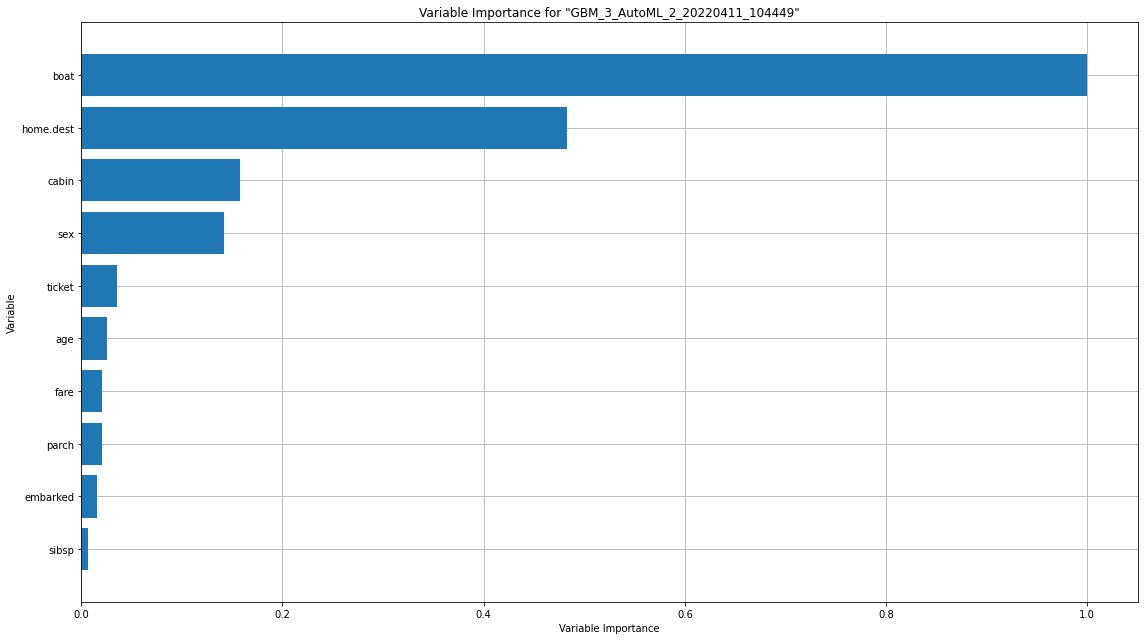

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

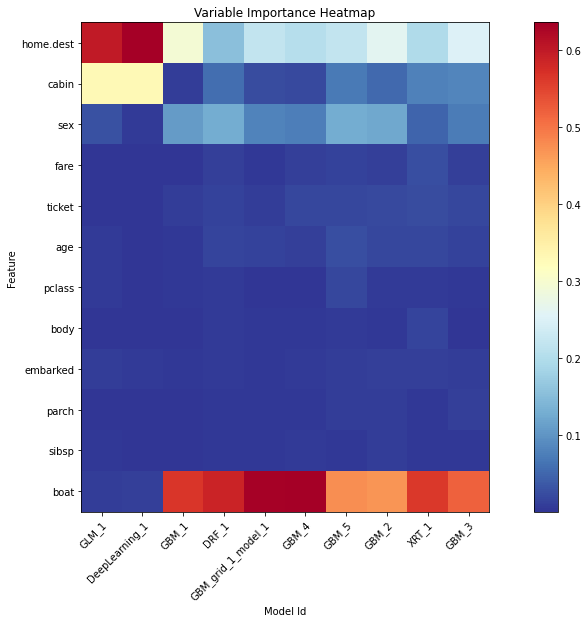

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

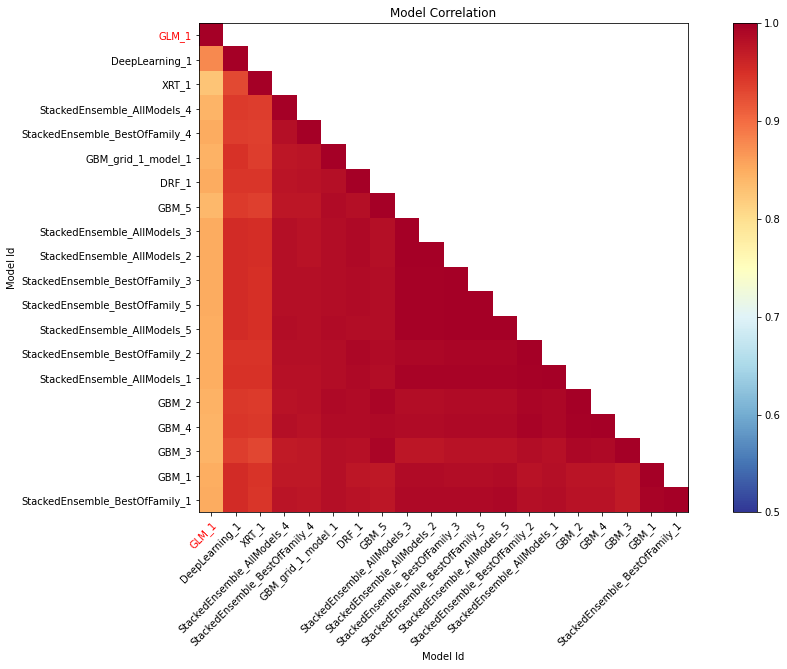

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

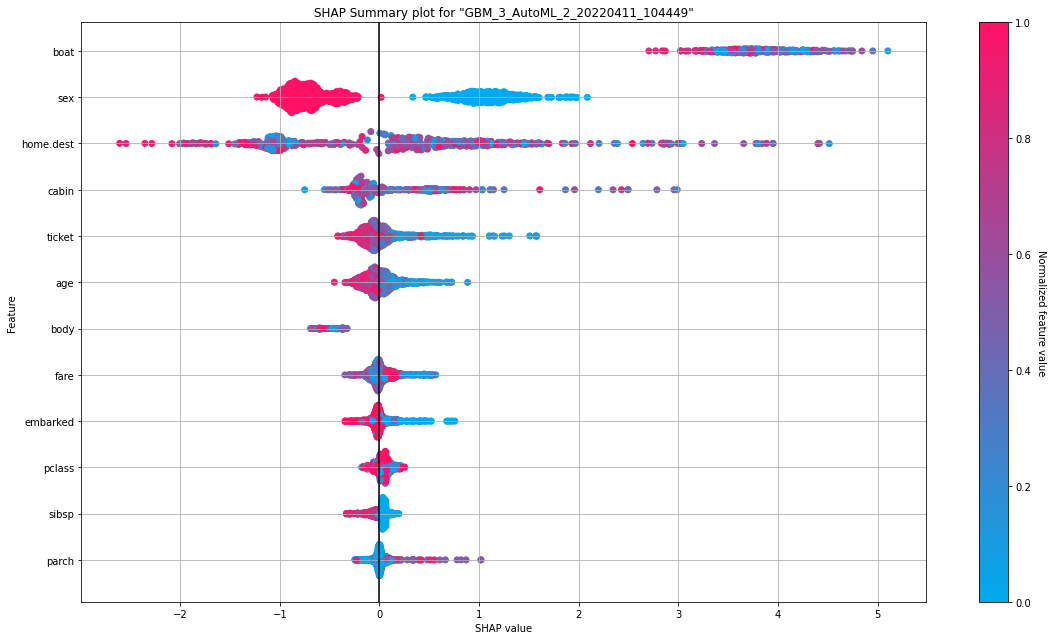

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

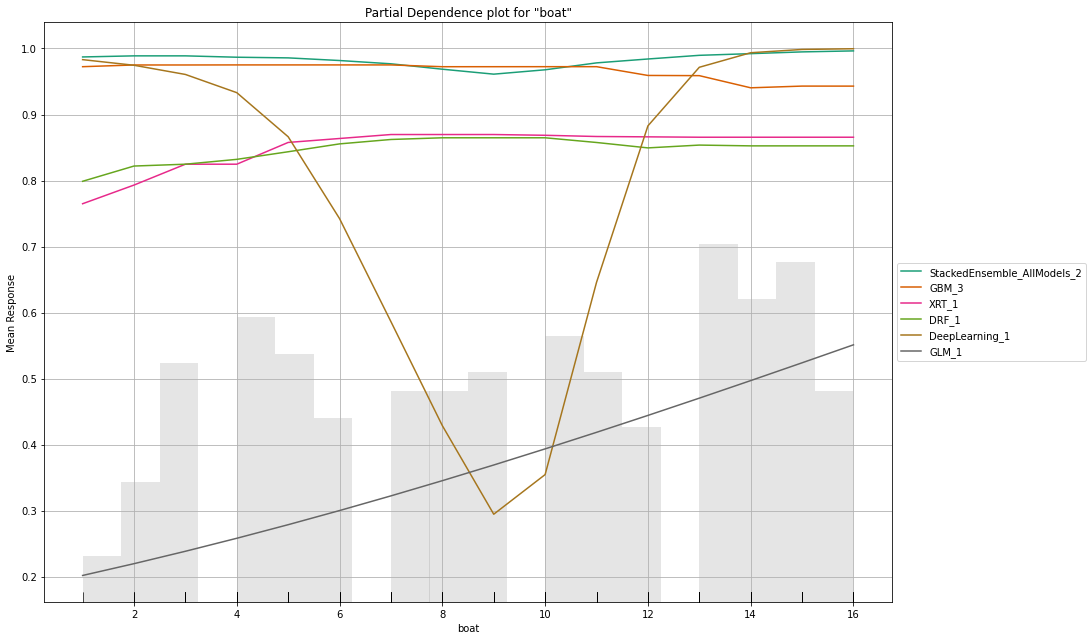

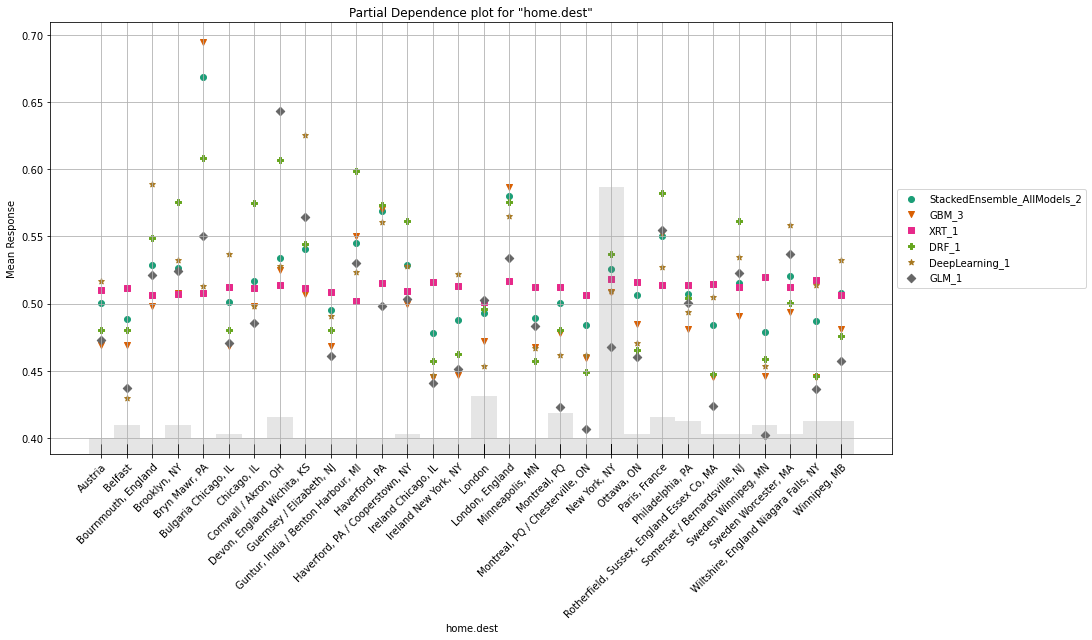

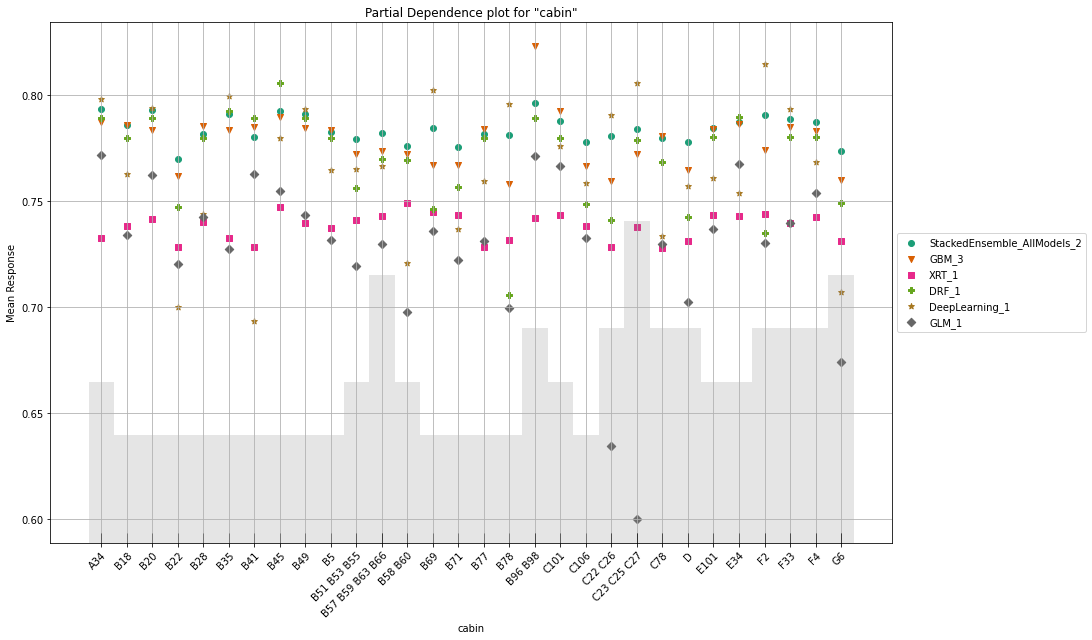

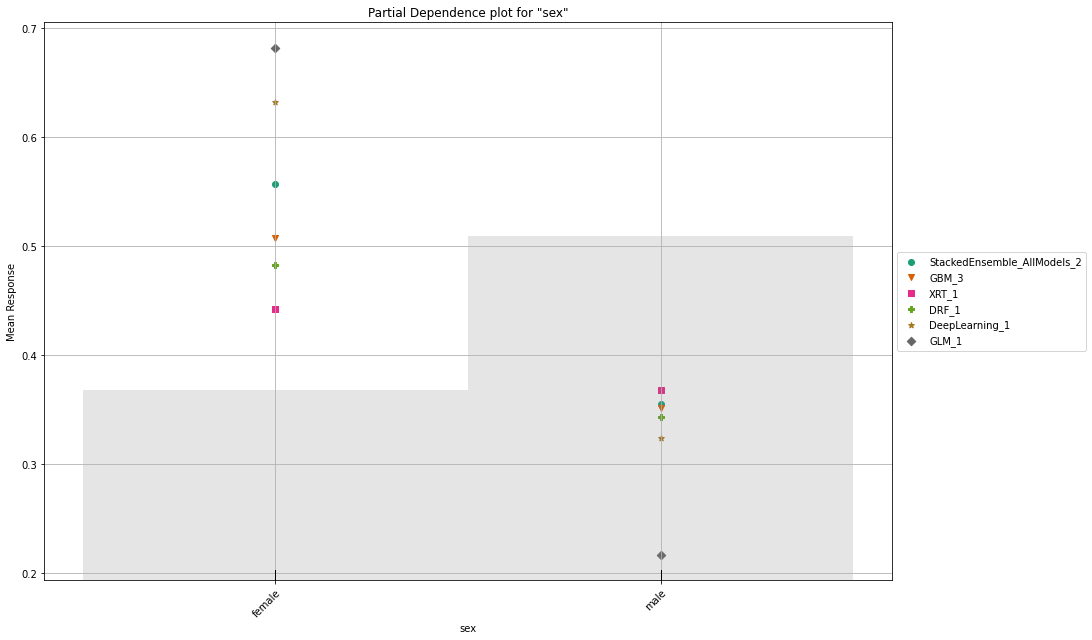

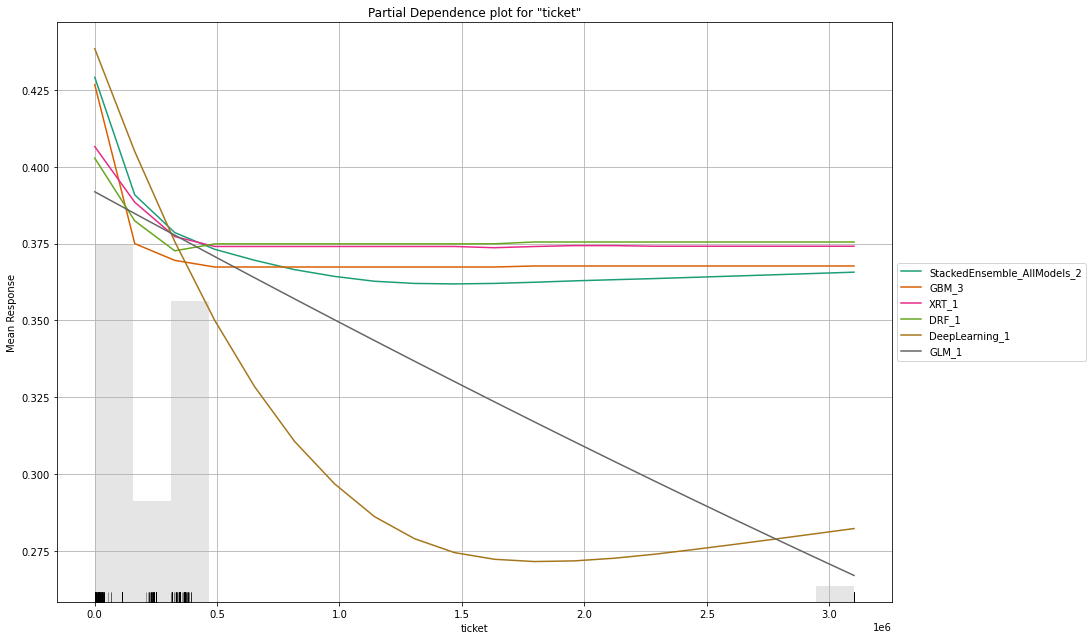

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_2_AutoML_2_20220411_104449


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3622645625569989: 


,,0,1,Error,Rate
0,0,797.0,12.0,0.0148,(12.0/809.0)
1,1,17.0,483.0,0.034,(17.0/500.0)
2,Total,814.0,495.0,0.0222,(29.0/1309.0)


# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

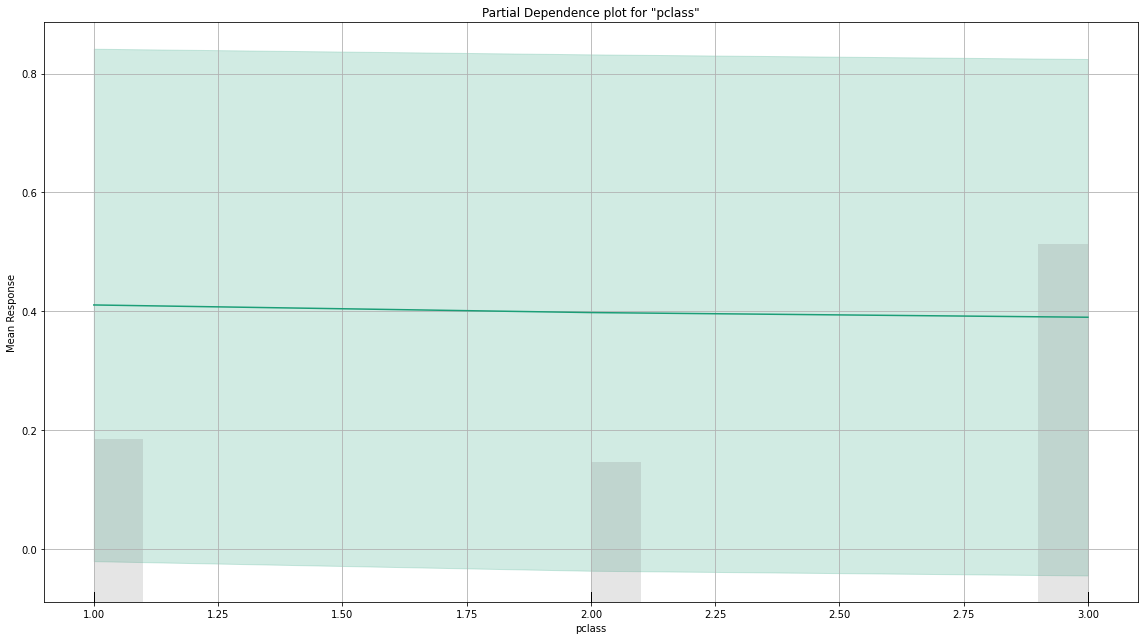

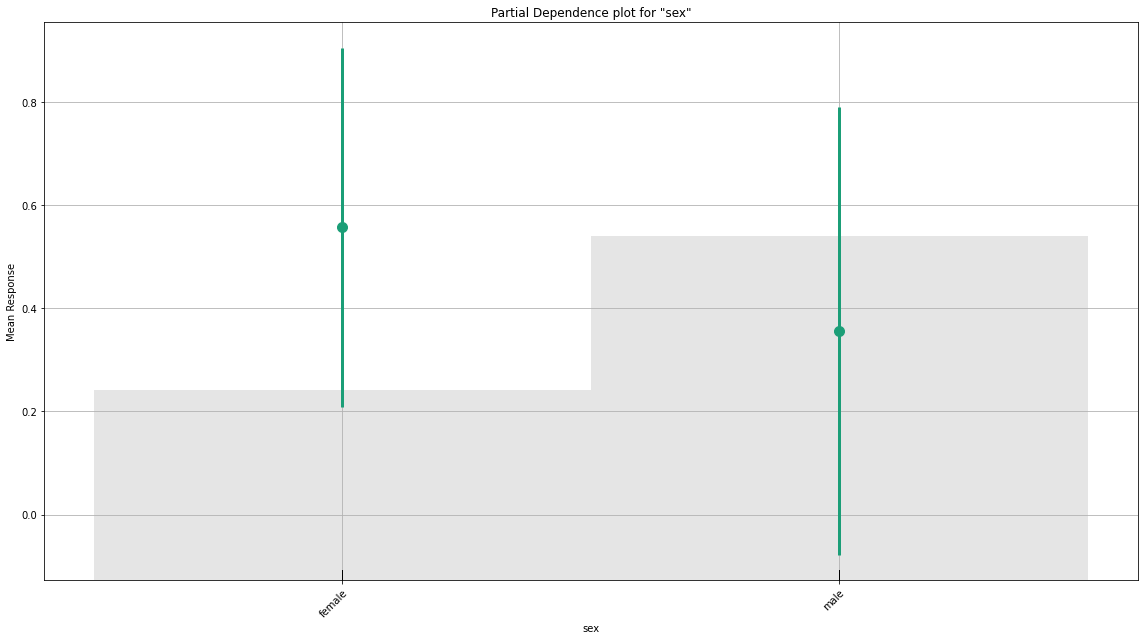

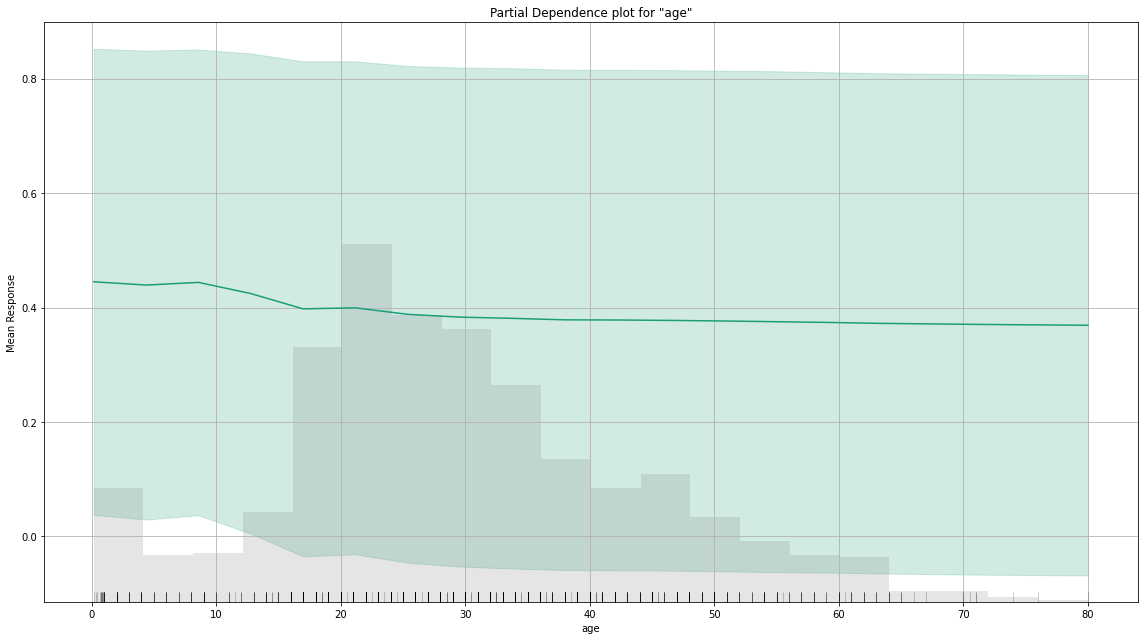

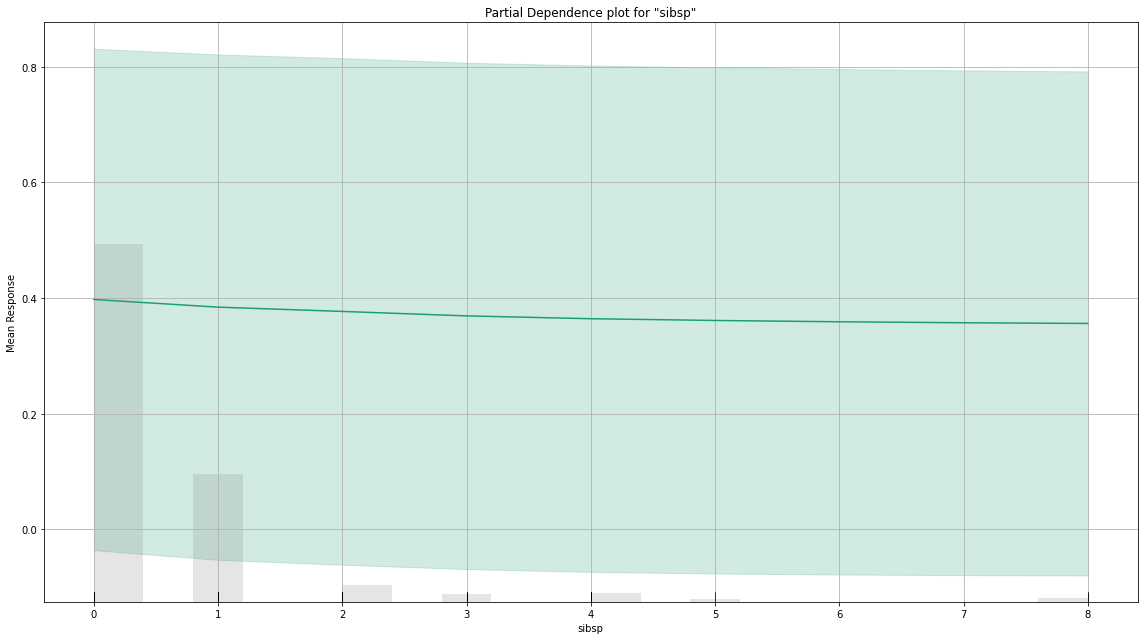

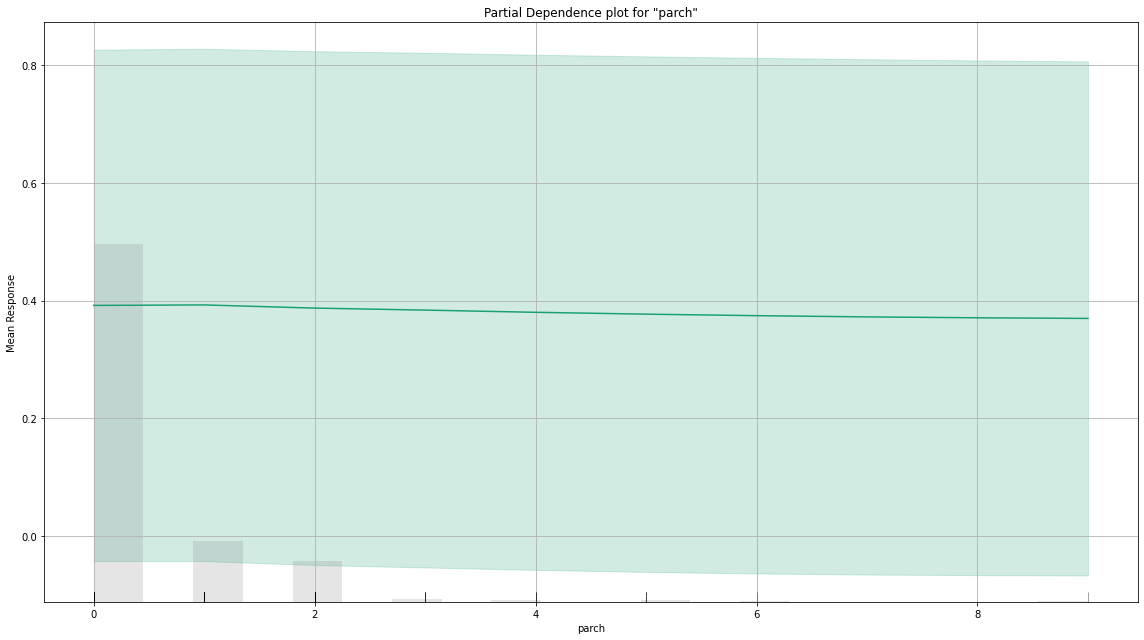

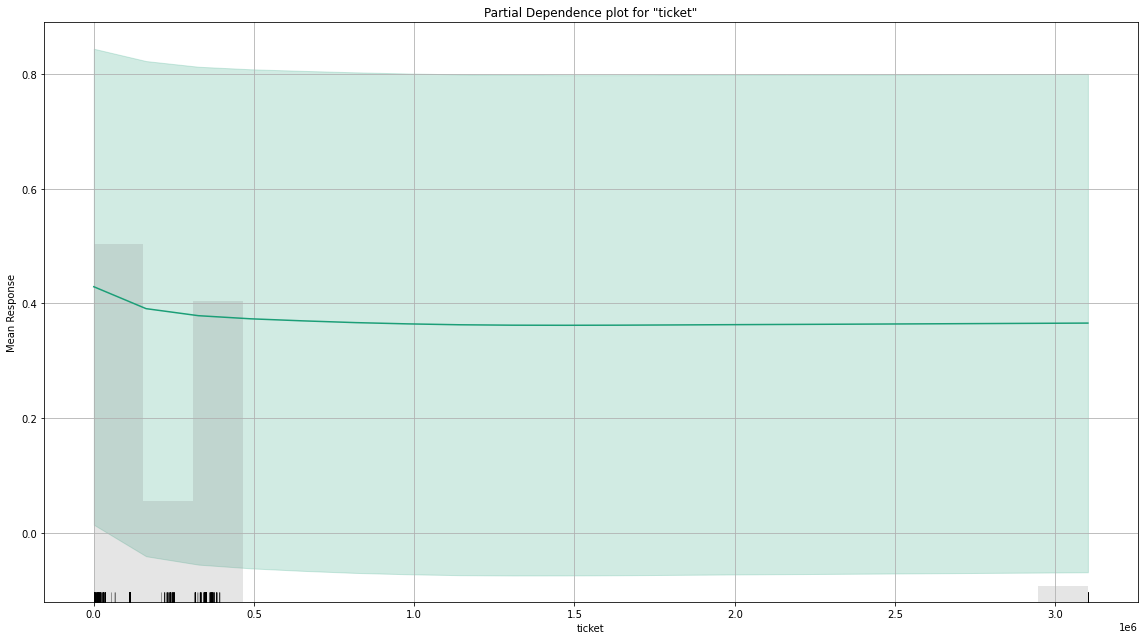

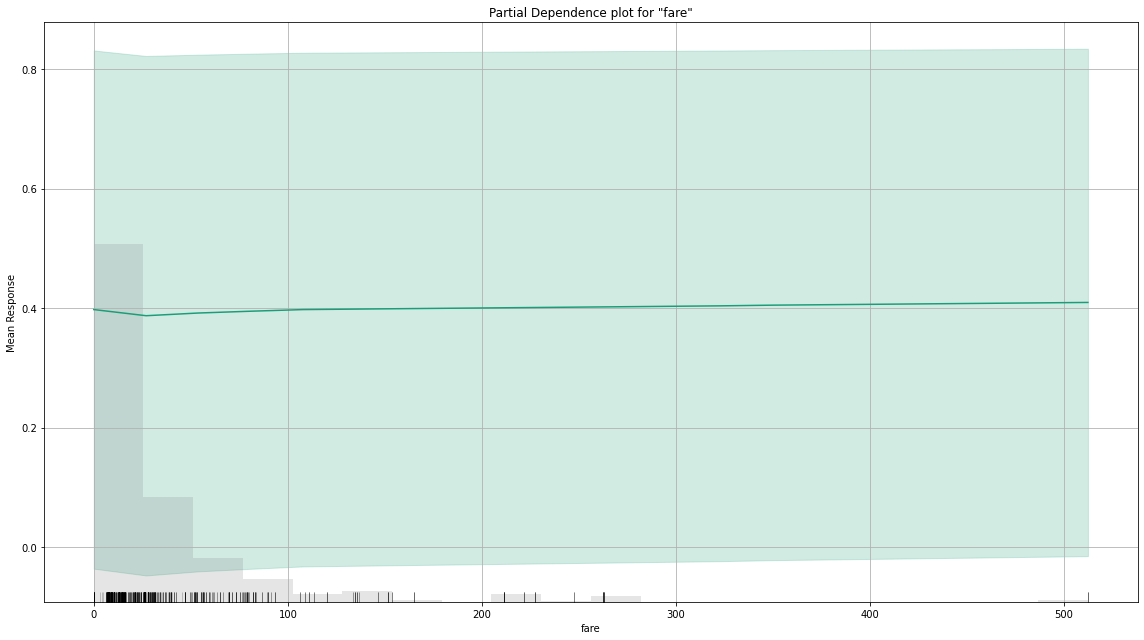

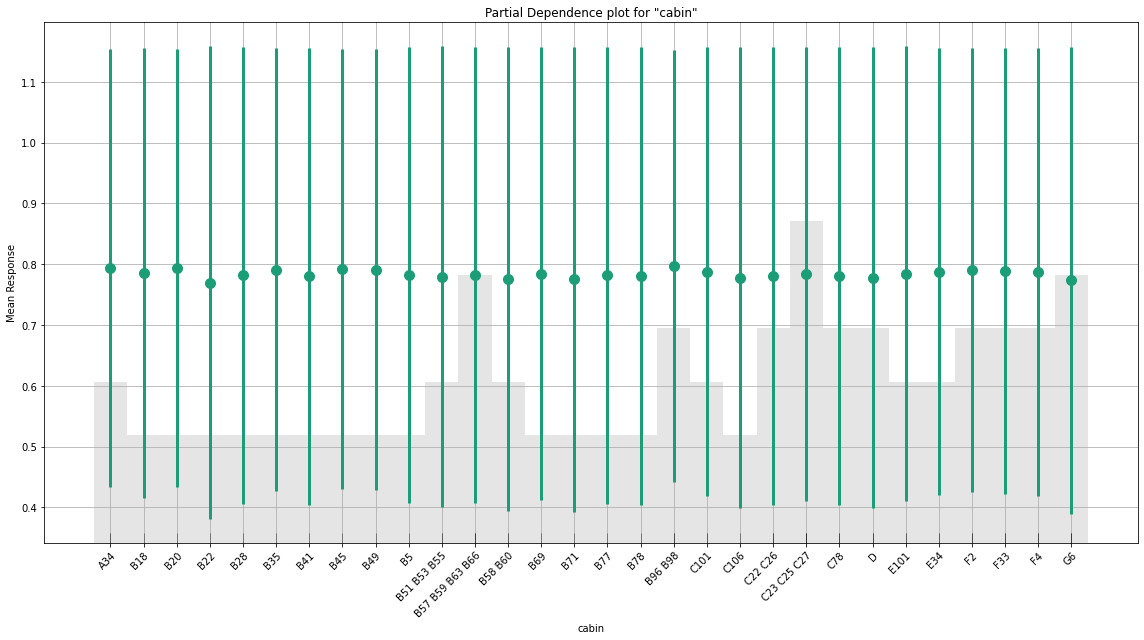

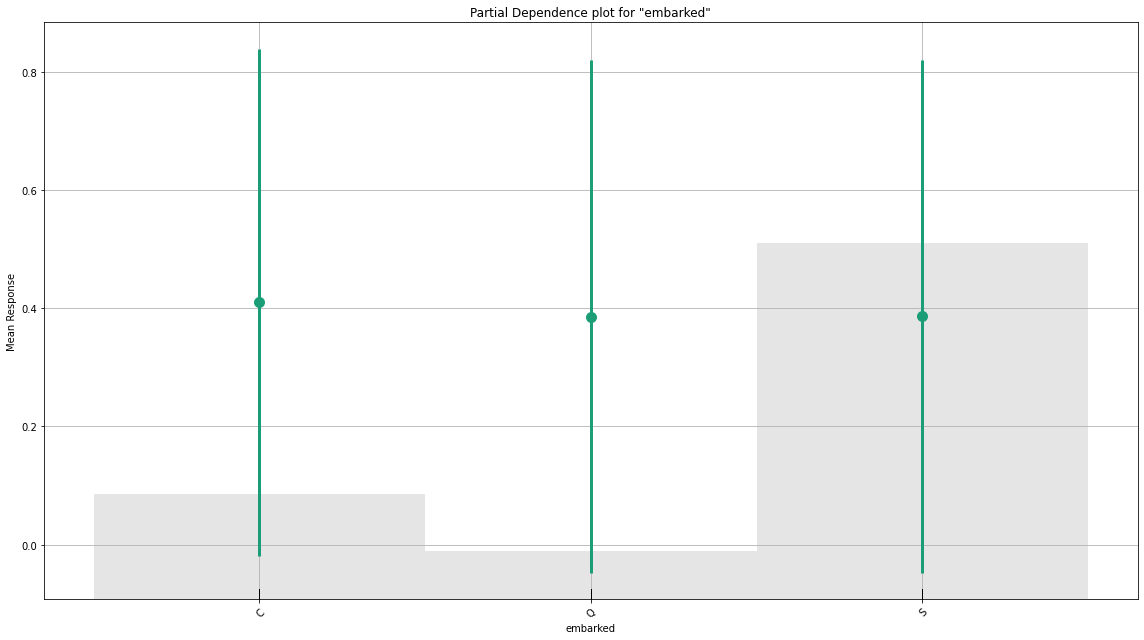

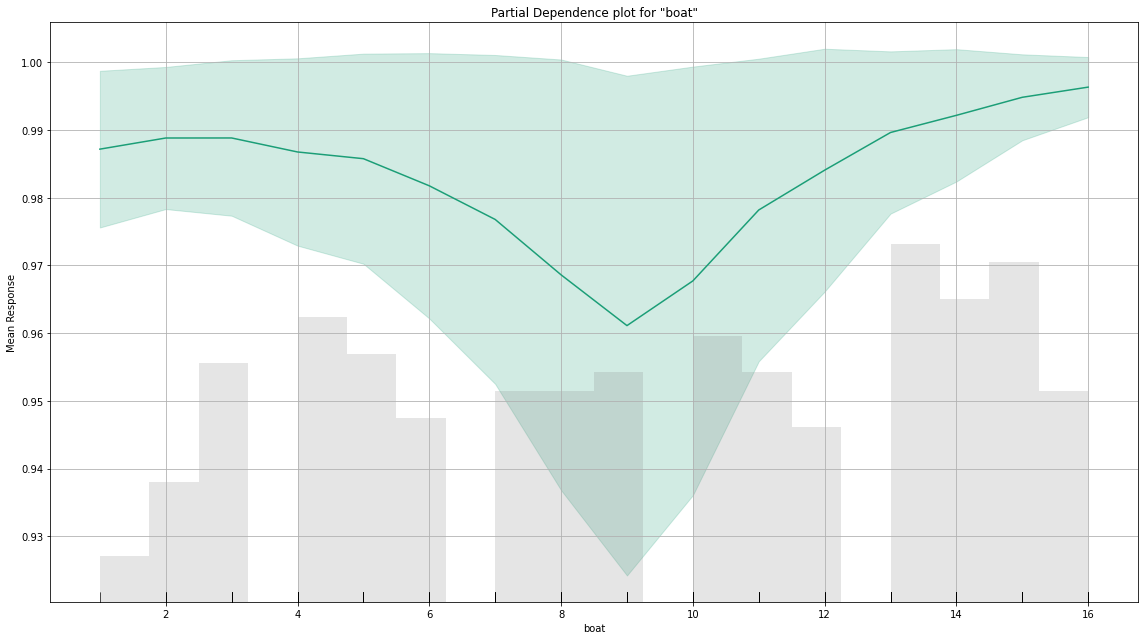

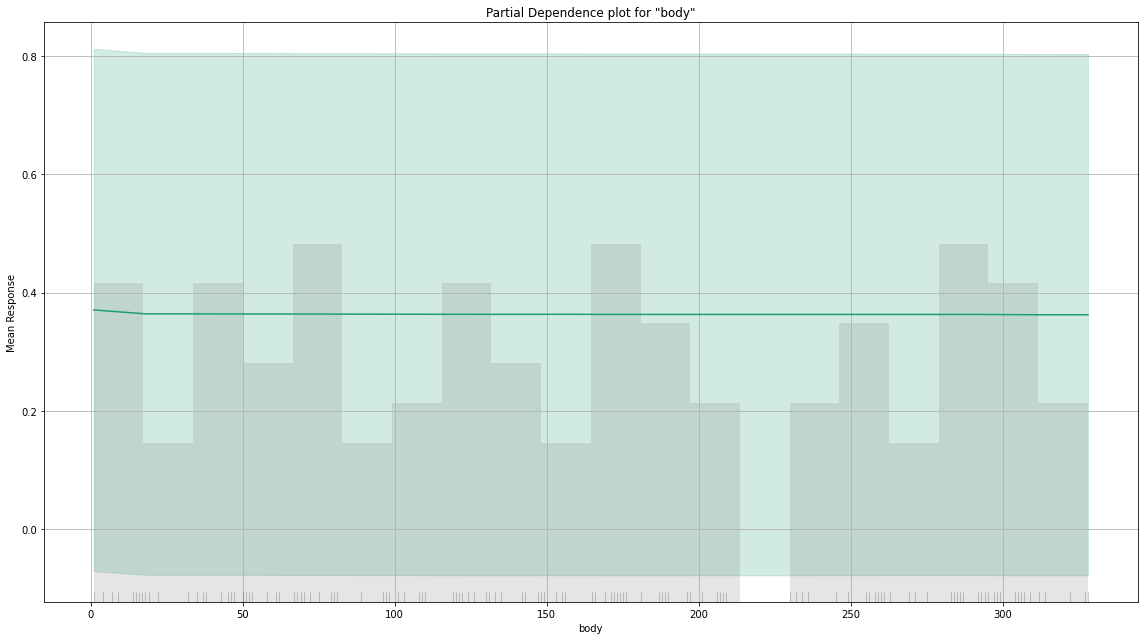

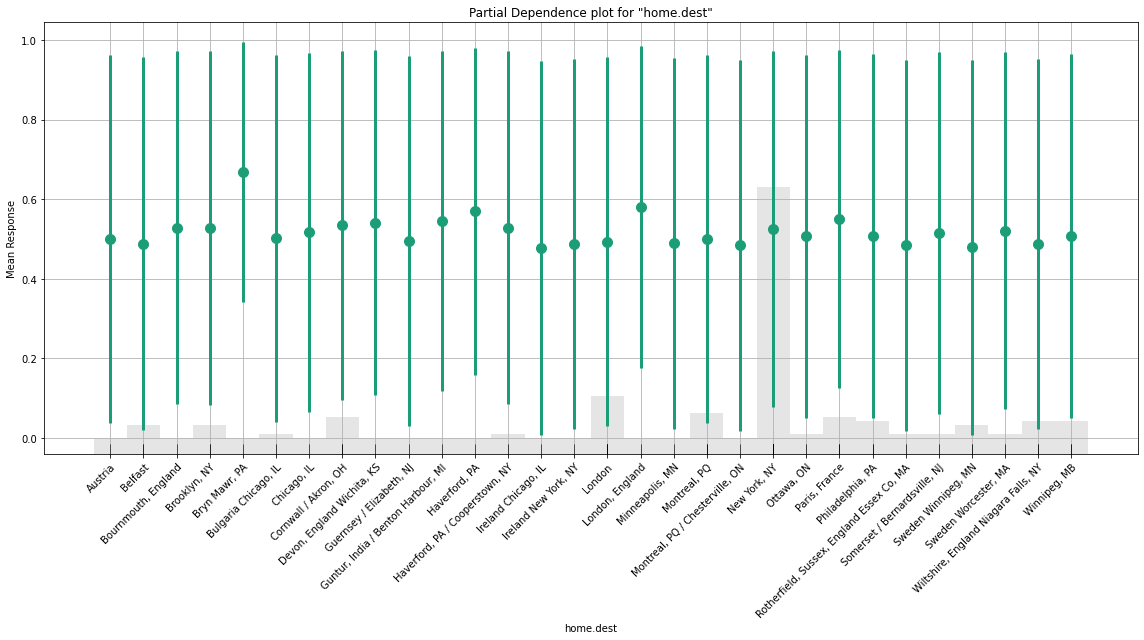

In [11]:
# Explain leader model & compare with all AutoML models
exa = aml.explain(train)

# Explain a single H2O model (e.g. leader model from AutoML)
exm = aml.leader.explain(train)